In [2]:
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
Swc = 0.1
Sor = 0.15
krwMax = 0.5
a = 8
kroMax = 1
b = 3
mu_w = 1.0e-03
mu_o = 1.0e-2
K = 1e-12

params = {
    'fw_inj':0.8,
    'Swc':0.1,
    'Sor':0.15,
    'krwMax':0.5,
    'a':8,
    'kroMax':1.0,
    'b':3,
    'muw': 1.0e-3,
    'muo': 1.0e-2,
    'K' : 1.0e-12
}


In [4]:

def calc_Se(params,Sw):
    Swc = params['Swc']
    Sor = params['Sor']

    return np.divide(Sw - Swc, 1-Sor - Swc)

def calc_krw(params, Sw):
    krwMax = params['krwMax']
    a = params['a']

    Se = calc_Se(params,Sw)

    return krwMax * np.power(Se, a)

def calc_kro(params, Sw):
    kroMax = params['kroMax']
    b = params['b']

    Se = calc_Se(params,Sw)

    return kroMax * np.power(1.0-Se, b)

def calc_fw(params, Sw):
    krw = calc_krw(params, Sw)
    kro = calc_kro(params, Sw)

    muw = params['muw']
    muo = params['muo']

    fw = (krw/muw) / (krw/muw + kro/muo)
    return fw

def func(x, params):
    fw_inj = params['fw_inj']

    mob_w = calc_krw(params, x) / params['muw']
    mob_o = calc_kro(params, x) / params['muo']

    return fw_inj - mob_w / (mob_w+mob_o)

def relativeSw(Sw):
    return (Sw - Swc) / (1.0 - Swc - Sor)

def correct_krw(Sw):
    return krwMax * (Sw)**a

def correct_kro(Sw):
    return kroMax * (1 - Sw)**b

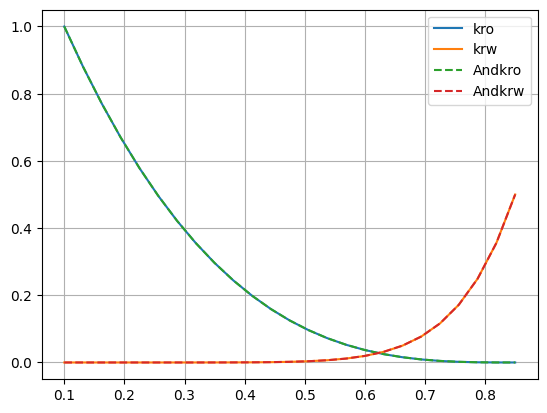

In [9]:
Sw = np.linspace(Swc, (1-Sor),num=25,endpoint=True)

Swr = relativeSw(Sw)
kro = correct_kro(Swr)
krw = correct_krw(Swr)

plt.plot(Sw,kro,label="kro")
plt.plot(Sw,krw,label="krw")

kro = calc_kro(params,Sw)
krw = calc_krw(params,Sw)

plt.plot(Sw,kro,'--',label="Andkro")
plt.plot(Sw,krw,'--',label="Andkrw")
plt.legend()
plt.grid()
plt.show()

In [19]:
Tr = K*(correct_krw(relativeSw(1-Sor))/mu_w)+(correct_kro(relativeSw(1-Sor))/mu_o)
Tr

5e-10

In [18]:
alpha = K * (calc_krw(params,(1-Sor))/params['muw'] + calc_kro(params,(1-Sor))/params['muo'])

alpha


5e-10

In [20]:
Vt = 1e-5

grad_p = Vt/Tr

grad_p

20000.0

In [21]:
# inlet
ut_in = 1.0e-5

gradP = ut_in / alpha

grad_p

20000.0